In [49]:
from nodepy.rooted_trees import *
import matplotlib.pyplot as plt


In [44]:
for p in range(7): print(rt.list_trees(p))

['']
['T']
['{T}']
['{{T}}', '{T^2}']
['{{T^2}}', '{{{T}}}', '{T{T}}', '{T^3}']
['{{T^3}}', '{{{T^2}}}', '{{{{T}}}}', '{{T{T}}}', '{T{T^2}}', '{T{{T}}}', '{T^2{T}}', '{{T}{T}}', '{T^4}']
['{{T^4}}', '{{{T^3}}}', '{{{{T^2}}}}', '{{{{{T}}}}}', '{{{T{T}}}}', '{{T{T^2}}}', '{{T{{T}}}}', '{{T^2{T}}}', '{{{T}{T}}}', '{T{T^3}}', '{T{{T^2}}}', '{T{{{T}}}}', '{T{T{T}}}', '{T^2{T^2}}', '{T^2{{T}}}', '{T^3{T}}', '{{T}{T^2}}', '{{T}{{T}}}', '{T{T}{T}}', '{T^5}']


Generate a list of isomorphism classes of all rooted trees with $\leq 13$ vertices and at most two children per parent. 

In [41]:
max_tree_size = 16
max_tree_depth = max_tree_size
trees_by_depth = [[("T",1)]] # Encode tree by (String,#vertices)
all_trees = []
for d in range(1,max_tree_depth+1):
    trees_by_depth.append([])
    for i,(tree,vertices) in enumerate(trees_by_depth[d-1]):
        if vertices >= max_tree_size:
            continue
        trees_by_depth[d].append(("{"+tree+"}",vertices+1))
        for tree2,vertices2 in (trees_by_depth[d-1][i:]+all_trees):
            if vertices+vertices2 >= max_tree_size:
                continue
            trees_by_depth[d].append(("{"+tree+"}{"+tree2+"}",vertices+vertices2+1))

    all_trees = all_trees + trees_by_depth[d-1]
all_trees = all_trees + trees_by_depth[max_tree_depth]

trees_by_size = [[] for v in range(max_tree_size+1)]
for tree,vertices in all_trees:
    trees_by_size[vertices].append(tree)

[len(trees) for trees in trees_by_size]

[0, 1, 1, 2, 3, 6, 11, 23, 46, 98, 207, 451, 983, 2179, 4850, 10905, 24631]

In [62]:
for i, tree in enumerate(trees_by_size[6]):
    nodepy_tree = tree.replace("{T}{T}","T^2")
    print(nodepy_tree)

{{T}}{T^2}
{{{T}}}{{T}}
{{{T}}{{T}}}
{{{T}}{T}}{T}
{{T^2}}{T}
{{T^2}{T}}
{{{{T}}}}{T}
{{{{T}}}{T}}
{{{{T}}{T}}}
{{{T^2}}}
{{{{{T}}}}}


{{T}}{{T}{T}}
{{{T}}}{{T}}
{{{T}}{{T}}}
{{{T}}{T}}{T}
{{{T}{T}}}{T}
{{{T}{T}}{T}}
{{{{T}}}}{T}
{{{{T}}}{T}}
{{{{T}}{T}}}
{{{{T}{T}}}}
{{{{{T}}}}}


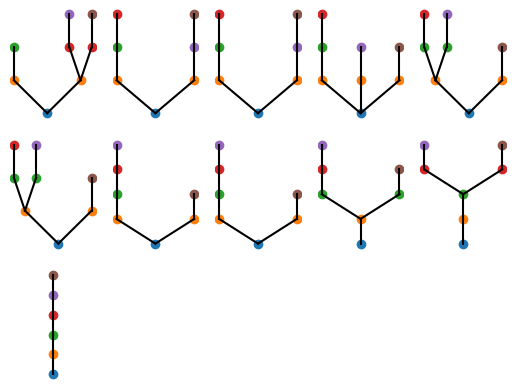

In [81]:
columns = 5
for i,tree in enumerate(trees_by_size[6]):
    nodepy_tree = tree.replace("{T}","T")
    nodepy_tree = tree.replace("TT","T^2")
    print(nodepy_tree)
    RootedTree(nodepy_tree).plot(len(trees_by_size[6]) // columns + 1, columns, i + 1)

{{T^4}}
{{{T^3}}}
{{{{T^2}}}}
{{{{{T}}}}}
{{{T{T}}}}
{{T{T^2}}}
{{T{{T}}}}
{{T^2{T}}}
{{{T}{T}}}
{T{T^3}}
{T{{T^2}}}
{T{{{T}}}}
{T{T{T}}}
{T^2{T^2}}
{T^2{{T}}}
{T^3{T}}
{{T}{T^2}}
{{T}{{T}}}
{T{T}{T}}
{T^5}


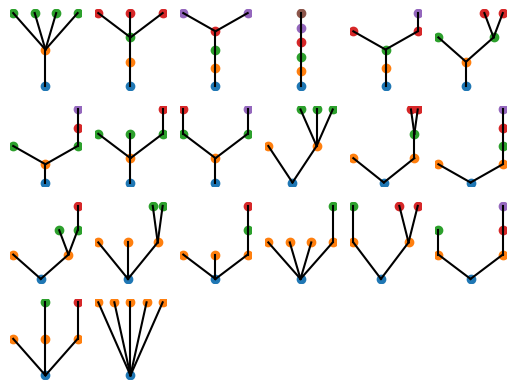

In [76]:
columns = 6
for i, tree in enumerate(rt.list_trees(6)):
    print(tree)
    #nodepy_tree = tree.replace("{T}{T}","T^2")
    RootedTree(tree).plot(len(rt.list_trees(6)) // columns + 1, columns, i + 1)

#[RootedTree(tree).plot() for tree in trees_by_size[6]]